In [1]:
## Atividade 6 - Trabalho Final de Mineração de Dados
## Daniel de Amaral da Silva
## Matricula: 385802

In [2]:
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
(observacoes, classe), (teste, classeTeste) = mnist.load_data()

In [4]:
data = np.row_stack((observacoes, teste))
label = np.concatenate((classe, classeTeste))

In [5]:
image_size = data.shape[1]
input_size = image_size * image_size

# resize and normalize
data = np.reshape(data, [-1, input_size])
data = data.astype('float32') / 255

In [6]:
# train, test
observacoes, teste, classe, classeTeste = train_test_split(data, label, test_size = 1/3)

In [7]:
# função para substituir por -1 algumas labels de forma estratificada
def unlabel_data(data, label):
  data1, data2, label1, label2 = train_test_split(data, label, test_size = 1/2)
  label2 = -np.ones(len(label2))
  return np.row_stack((data1, data2)), np.concatenate((label1, label2))

In [8]:
# substituindo por -1 na classe
observacoes, classe = unlabel_data(observacoes, classe)

In [9]:
# Classificador foco da atividade 6
class ClassificadorSemiSuper:
  
  def __init__(self, classificador, k):
    self.clf = classificador
    self.k = k
    
  def fit(self, observacoes, classe):
    mask = classe == -1
    obs_unl = observacoes[mask]
    class_unl = classe[mask]
    obs_l = observacoes[~mask]
    class_l = classe[~mask]
    
    x_train = obs_l
    y_train = class_l
    for obs in np.arange(0, obs_unl.shape[0], self.k):
      x_test = obs_unl[obs:obs+self.k,:]
      self.clf.fit(x_train, y_train)
      y_pred = self.clf.predict(x_test)
      x_train = np.row_stack((x_train, x_test))
      y_train = np.concatenate((y_train, y_pred))
    
    self.clf.fit(x_train, y_train)
  
  
  def score(self, teste, classeTeste):
    return accuracy_score(classeTeste, self.clf.predict(teste))

In [10]:
clf = KNeighborsClassifier(n_neighbors = 3)

In [11]:
classificadorSS = ClassificadorSemiSuper(clf, 1000)

In [12]:
classificadorSS.fit(observacoes, classe)

In [13]:
classificadorSS.score(teste, classeTeste)

0.9664438158909745

In [14]:
def hyperparm_experimenter(clf, range_k, observacoes, classe, teste, classeTeste):
  acc_history = []
  time_history = []
  for k in range_k:
    classificadorSS = ClassificadorSemiSuper(clf, k)
    
    start_time = time.time()
    classificadorSS.fit(observacoes, classe)
    time_history.append(time.time() - start_time)
    acc = round(classificadorSS.score(teste, classeTeste), 4)
    acc_history.append(acc)
    print(f'Valor de k: {k}, Acurácia: {acc}')
  
  plt.plot(range_k, acc_history)
  plt.title('Acurácia pelo tamanho do lote k')
  plt.ylabel('acurácia')
  plt.xlabel('k')
  plt.show()
  
  plt.plot(range_k, time_history)
  plt.title('Tempo de processamento pelo tamanho do lote k')
  plt.ylabel('tempo em segundos')
  plt.xlabel('k')
  plt.show()

Valor de k: 500, Acurácia: 0.9664
Valor de k: 700, Acurácia: 0.9665
Valor de k: 900, Acurácia: 0.9664
Valor de k: 1000, Acurácia: 0.9664
Valor de k: 2000, Acurácia: 0.9664
Valor de k: 3000, Acurácia: 0.9665
Valor de k: 5000, Acurácia: 0.9668
Valor de k: 10000, Acurácia: 0.9664
Valor de k: 14000, Acurácia: 0.9664
Valor de k: 17000, Acurácia: 0.9665
Valor de k: 20000, Acurácia: 0.9667


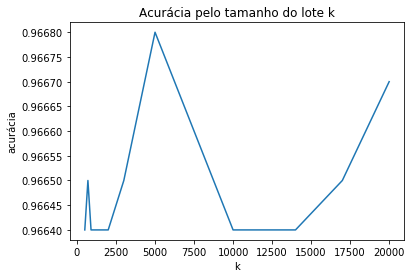

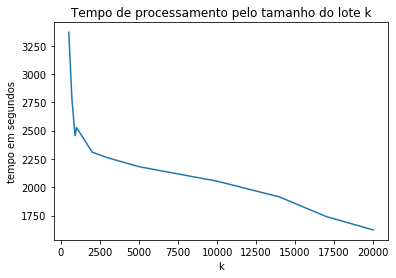

In [15]:
hyperparm_experimenter(clf, [500, 700, 900, 1000, 2000, 3000, 5000, 10000, 14000, 17000, 20000], observacoes, classe, teste, classeTeste)